In [16]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [17]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)
data.dropna(inplace=True)
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


In [18]:
data.index = pd.to_datetime(data.index)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [19]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [20]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [21]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [22]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [23]:
import matplotlib.pyplot as plt

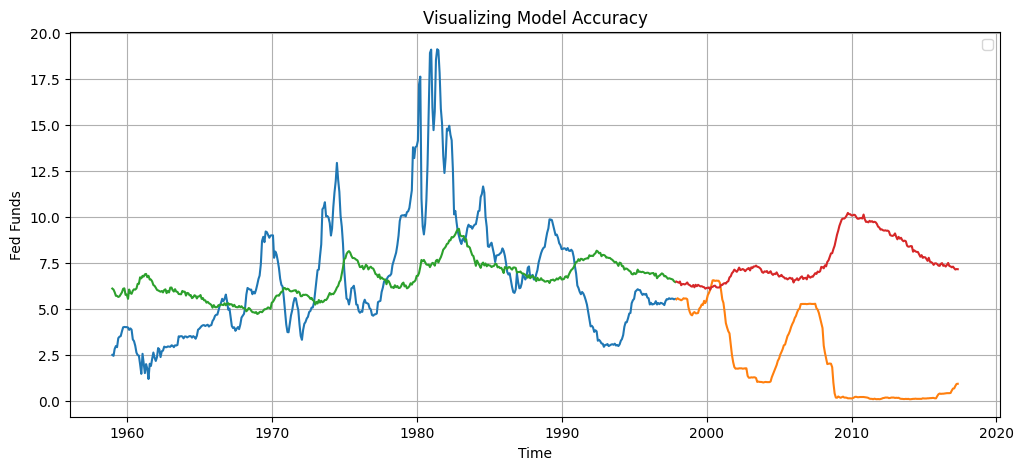

In [24]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [27]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
max_degrees = 3

Degrees: 1


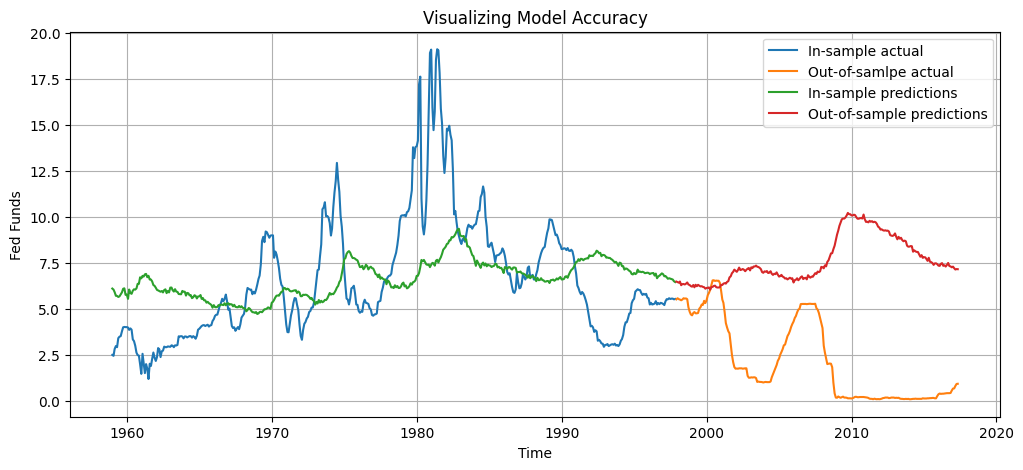

Degrees: 2


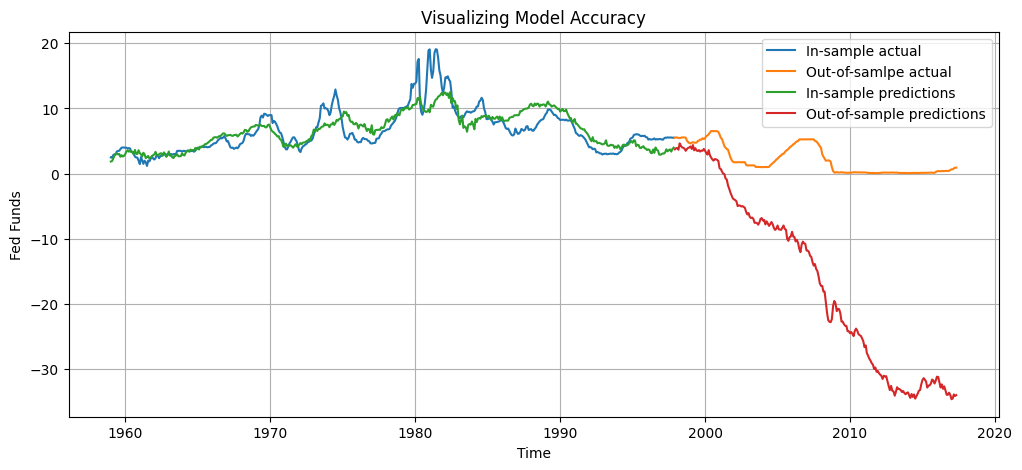

Degrees: 3


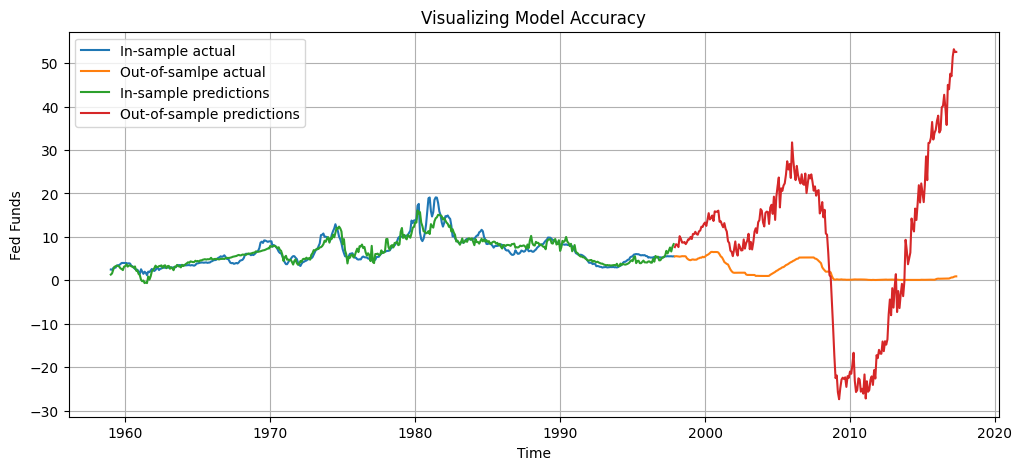

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744
__________


In [30]:
for degrees in range(1, 1+max_degrees):
    print("Degrees:", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
#Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()

#Q4
    plt.figure(figsize = (12,5))

###
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In-sample actual", "Out-of-samlpe actual", "In-sample predictions", "Out-of-sample predictions"])
    plt.grid()
    plt.show()

#Q5
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)
print("__________")

# 7.) State your observations :

In-sample actual: training data 

Out-of-sample actual: testing data

In-sample predictions: predicted on training data

Out-of sample predictions: predicted on testing data

 
We can see that as the degree of polynomial rises, the in-sample predictions start to follow more closely the in-sample actual. However, in all three plynomial degrees the out-of sample predictions, does not converge to the out-of-sample actual. The selection of the final model is based on the out-of-sample performance, as it shows how well the model assimilates unseen data. In the plot of the 3rd degree polynomial there is some similarity in the trend between the two around 2000 to 2010.

In-sample MSE: based on traing data

Out-sample MSE: based on testing data 

When we look at the MSE, we can observe that the in-sample MSE is pretty good, whereas the  performance of the out-sample MSE is much poorer. This could indicate overfitting of the model, which means poor generalization of the data due to the fact that the model has memorized the data too well and capures too much noise, not only trends. Additionaly, in the 3rd degree polynomial, we can see how close the in-sample actual and prediction are vs the out-of-sample, with the ou-of-sample predictions spiking up and down at a much higher rate than the actual data.